In [1]:
# !pip install python_speech_features
# !pip install h5py

## This notebook was used in Google Colaboratory

so it may require some changes to reproduce the results. Nevertheless I've tried to optimise the code for using it on local machine.

### Load libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.layers import Bidirectional
import h5py

Using TensorFlow backend.


### Load data from Drive

In [1]:
# !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
# !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
# !apt-get update -qq 2>&1 > /dev/null
# !apt-get -y install -qq google-drive-ocamlfuse fuse

# from google.colab import auth
# auth.authenticate_user()
# from oauth2client.client import GoogleCredentials
# creds = GoogleCredentials.get_application_default()
# import getpass

# !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
# vcode = getpass.getpass()
# !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [2]:
# !mkdir -p drive
# !google-drive-ocamlfuse drive

In [3]:
# !ls drive/STC_data

### Load data locally

In [3]:
path = os.getcwd()
print(path)

/content/drive


### Read data

In [4]:
h5f = h5py.File(path + '/target.h5','r')
Y_train = h5f['target'][:]
h5f.close()

h5f = h5py.File(path + '/train.h5','r')
X_train = h5f['train'][:]
h5f.close()

print('Target shape', Y_train.shape)
print('Train shape', X_train.shape)

Target shape (16241, 8)
Train shape (16241, 600, 13)


### Build a bidirectional LSTM classifier

In [6]:
np.random.seed(14)  # fix the random numbers generator state

batch_size = 100
hidden_units = 80
input_shape = X_train.shape[1:]
nb_epochs = 10
nb_classes = 8
dropout = 0.2
early_stopping = EarlyStopping(monitor='loss', min_delta=0, patience=0, verbose=1)
print('Build model...')

# sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

model = Sequential()
model.add(Bidirectional(LSTM(units=hidden_units, kernel_initializer='uniform', recurrent_initializer='uniform', 
               dropout=dropout, use_bias=True, unit_forget_bias=True, activation='tanh', recurrent_activation='sigmoid', 
               input_shape=input_shape), input_shape=input_shape, merge_mode='concat'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer='adam')

print("Train...")
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epochs, verbose=1, callbacks=[early_stopping])

Build model...
Train...
Epoch 1/10
16241/16241 [==============================] - 371s 23ms/step - loss: 1.2117 - categorical_accuracy: 0.5532
Epoch 2/10
16241/16241 [==============================] - 370s 23ms/step - loss: 0.8366 - categorical_accuracy: 0.7131
Epoch 3/10
 9400/16241 [================>.............] - ETA: 2:36 - loss: 0.6551 - categorical_accuracy: 0.777316241/16241 [==============================] - 373s 23ms/step - loss: 0.6320 - categorical_accuracy: 0.7840
Epoch 4/10
16241/16241 [==============================] - 375s 23ms/step - loss: 0.5281 - categorical_accuracy: 0.8199
Epoch 5/10
16241/16241 [==============================] - 375s 23ms/step - loss: 0.4640 - categorical_accuracy: 0.8440
Epoch 6/10
  100/16241 [..............................] - ETA: 6:14 - loss: 0.5042 - categorical_accuracy: 0.820016241/16241 [==============================] - 371s 23ms/step - loss: 0.4169 - categorical_accuracy: 0.8583
Epoch 7/10
16241/16241 [==============================] - 

### Visualize training

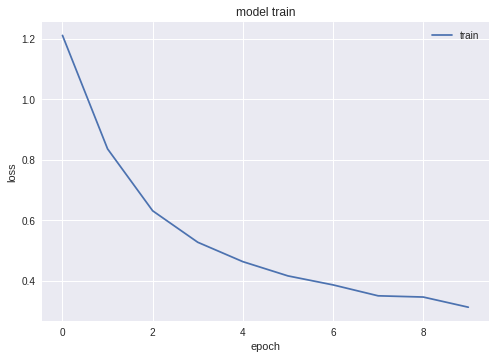

In [7]:
plt.plot(history.history['loss'])
plt.title('model train')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

### Save model and weigths

In [0]:
model.save('bidirLSTM.h5')

# from google.colab import files
# files.download('bidirLSTM.h5')

In [4]:
# from google.colab import auth
# auth.authenticate_user()
# from googleapiclient.discovery import build
# drive_service = build('drive', 'v3')

# from googleapiclient.http import MediaFileUpload

# file_metadata = {
#   'name': 'bidirLSTM.h5'
# }
# media = MediaFileUpload('bidirLSTM.h5',
#                         resumable=True)
# created = drive_service.files().create(body=file_metadata,
#                                        media_body=media,
#                                        fields='id').execute()
# print('File ID: {}'.format(created.get('id')))